In [1]:
EXP_NAME="ViTDCNv2_tuner_config_ML_1M"

In [2]:
from itertools import product
import yaml

with open(f'config/{EXP_NAME}.yaml', 'r') as file:
    config = yaml.safe_load(file)
tuner_space = config['tuner_space']
hyperparameters = list(tuner_space.keys())
params = [k for k, v in tuner_space.items() if type(v) == list and len(v) >=2]
hyperparameter_values = []

for hp in hyperparameters:
    value = tuner_space[hp]
    if isinstance(value, list):
        hyperparameter_values.append(value)
    else:
        hyperparameter_values.append([value])

combinations = [dict(zip(hyperparameters, values)) for values in product(*hyperparameter_values)]
combinations[:5]

[{'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 2},
 {'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 4},
 {'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 8},
 {'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'net_dropout': 0.1,
  'vit_patch_size': 4,
  'vit_hidden_dim': 64,
  'vit_num_layers': 1,
  'vit_num_heads': 16},
 {'model_root': './checkpoints/',
  'learning_rate': 0.001,
  'batch_size': 4096,
  'num_cross_layers': 1,
  'n

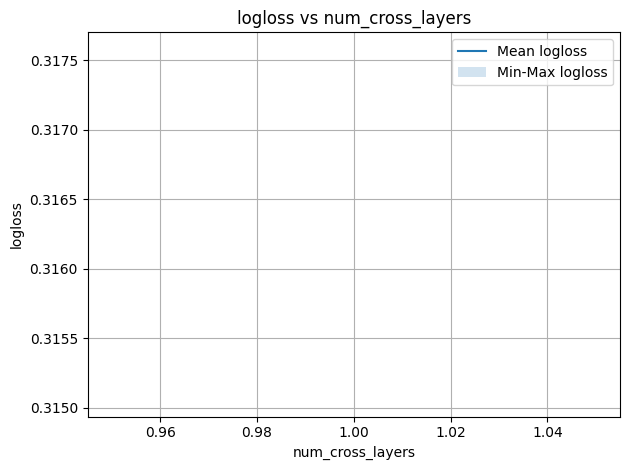

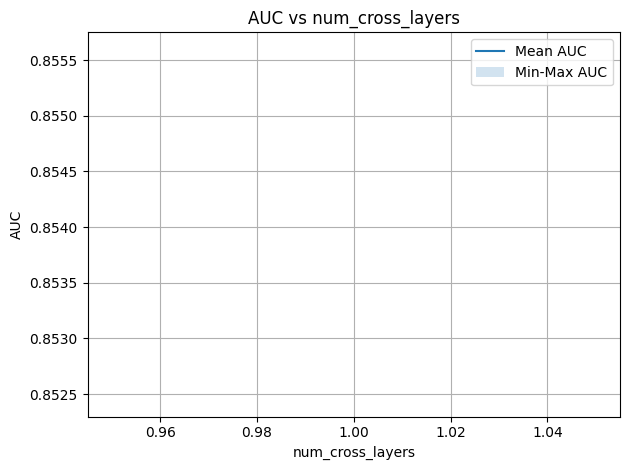

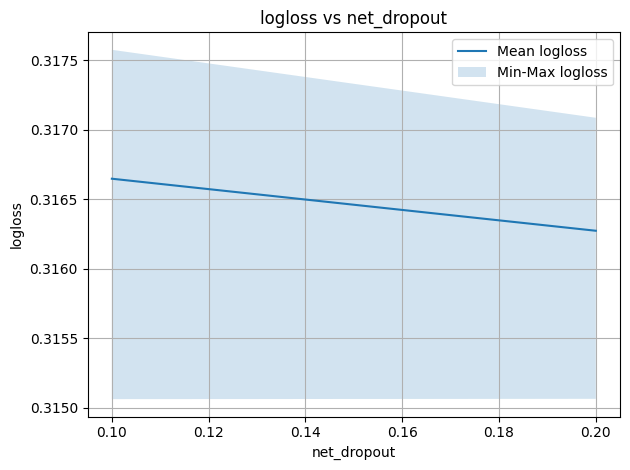

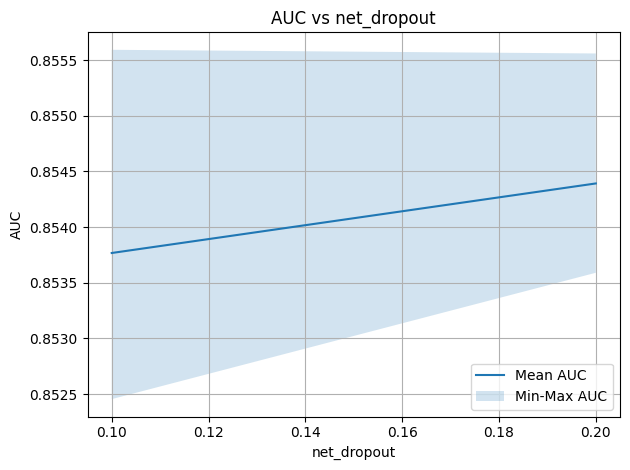

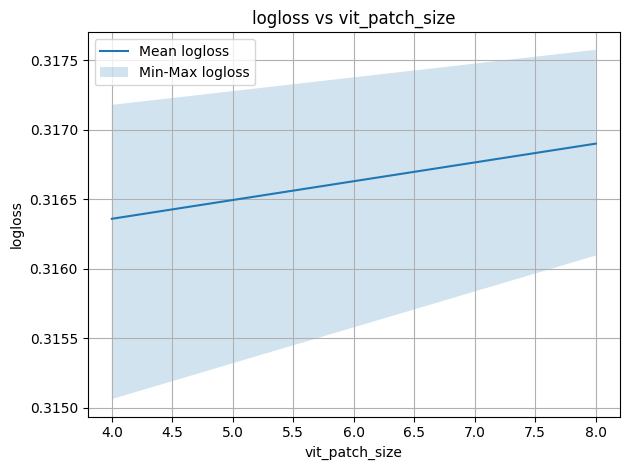

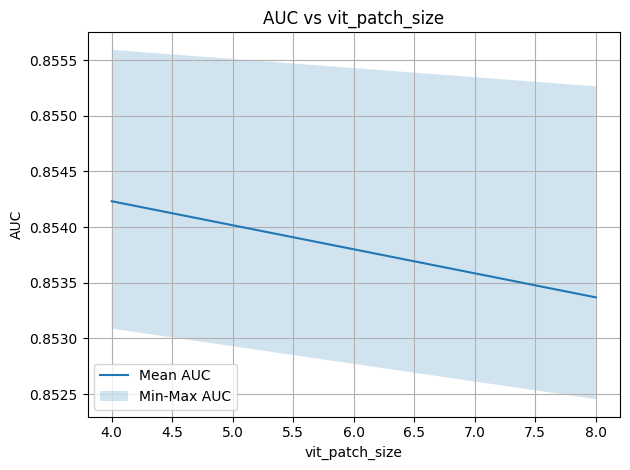

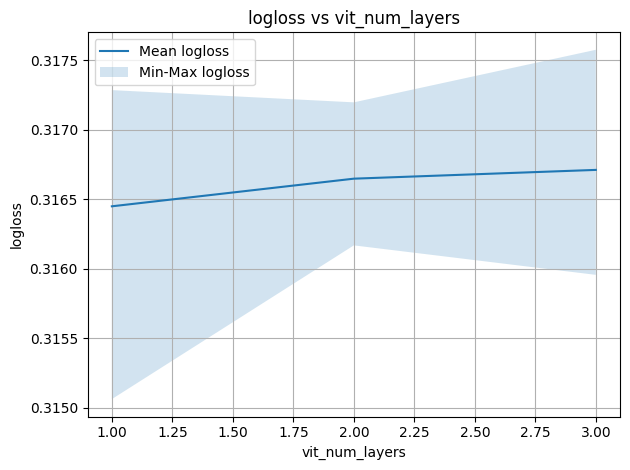

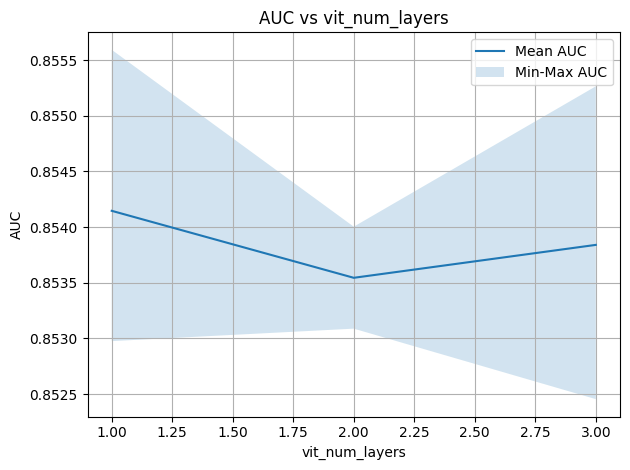

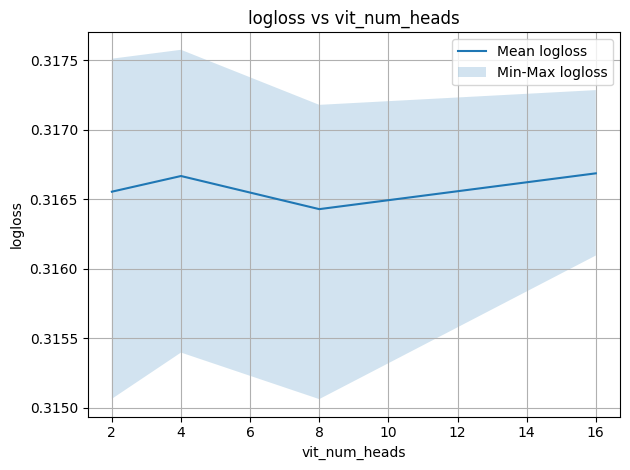

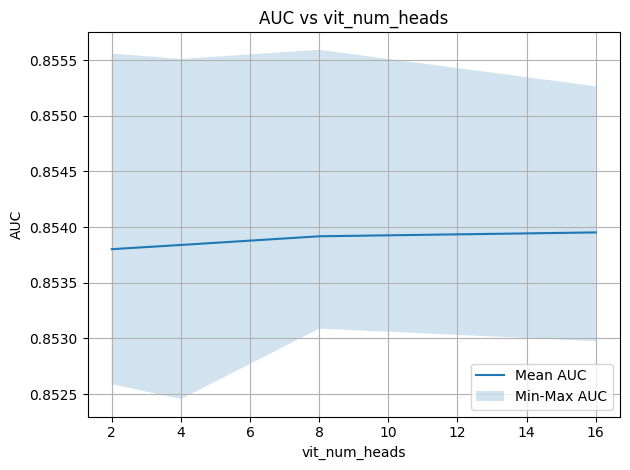

In [3]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            results.append({'logloss': logloss, 'AUC': auc})

num_entries = min(len(combinations), len(results))
aligned_data = []
for i in range(num_entries):
    data_entry = combinations[i].copy()
    data_entry.update(results[i])
    aligned_data.append(data_entry)

metrics = ['logloss', 'AUC']
metrics_per_hyperparam = {}

for hp in params:
    metrics_per_hyperparam[hp] = {}
    for entry in aligned_data:
        value = entry[hp]
        if value not in metrics_per_hyperparam[hp]:
            metrics_per_hyperparam[hp][value] = {metric: [] for metric in metrics}
        for metric in metrics:
            metrics_per_hyperparam[hp][value][metric].append(entry[metric])

# Step 5: Compute min, max, mean for each hyperparameter value
stats_per_hyperparam = {}

for hp, values in metrics_per_hyperparam.items():
    stats_per_hyperparam[hp] = {}
    for value, metrics_dict in values.items():
        stats_per_hyperparam[hp][value] = {}
        for metric, metric_values in metrics_dict.items():
            data = np.array(metric_values)
            stats_per_hyperparam[hp][value][metric] = {
                'min': data.min(),
                'max': data.max(),
                'mean': data.mean()
            }

# Step 6: Plot the results
for hp in params:
    values_stats = sorted(stats_per_hyperparam[hp].items(), key=lambda x: x[0])
    values = [v for v, _ in values_stats]
    for metric in metrics:
        metric_mean = [stats[metric]['mean'] for _, stats in values_stats]
        metric_min = [stats[metric]['min'] for _, stats in values_stats]
        metric_max = [stats[metric]['max'] for _, stats in values_stats]

        plt.figure()
        plt.plot(values, metric_mean, label=f'Mean {metric}')
        plt.fill_between(values, metric_min, metric_max, alpha=0.2, label=f'Min-Max {metric}')
        plt.xlabel(hp)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {hp}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        # plt.savefig(f'{metric}_vs_{hp}.png')
        plt.close()


In [4]:
results

[{'logloss': 0.317063, 'AUC': 0.853653},
 {'logloss': 0.315398, 'AUC': 0.855511},
 {'logloss': 0.315063, 'AUC': 0.855593},
 {'logloss': 0.316896, 'AUC': 0.853552},
 {'logloss': 0.316169, 'AUC': 0.854004},
 {'logloss': 0.316582, 'AUC': 0.853648},
 {'logloss': 0.31718, 'AUC': 0.853088},
 {'logloss': 0.316523, 'AUC': 0.853634},
 {'logloss': 0.316694, 'AUC': 0.85365},
 {'logloss': 0.315957, 'AUC': 0.855076},
 {'logloss': 0.316877, 'AUC': 0.853883},
 {'logloss': 0.316352, 'AUC': 0.854701},
 {'logloss': 0.317086, 'AUC': 0.853606},
 {'logloss': 0.316878, 'AUC': 0.853266},
 {'logloss': 0.316887, 'AUC': 0.853478},
 {'logloss': 0.317286, 'AUC': 0.852976},
 {'logloss': 0.316326, 'AUC': 0.853514},
 {'logloss': 0.317198, 'AUC': 0.853332},
 {'logloss': 0.316662, 'AUC': 0.853163},
 {'logloss': 0.316673, 'AUC': 0.853681},
 {'logloss': 0.317512, 'AUC': 0.85259},
 {'logloss': 0.317576, 'AUC': 0.852455},
 {'logloss': 0.316632, 'AUC': 0.853104},
 {'logloss': 0.316096, 'AUC': 0.855265},
 {'logloss': 0.3150